## To develop a machine learning model that can accurately predict the price of a diamond based on its physical characteristics

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset

data = pd.read_csv("Diamond Price prediction.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


# Perform Domain Analysis

carat: Weight of the diamond (numeric) — heavily affects price.

cut: Quality of the diamond cut (categorical: Ideal, Premium, Good, etc.) — affects sparkle and price.

color: Color grade of the diamond (categorical: D to J) — lower letter = better color = higher price.

clarity: Internal purity or flaw grade (categorical: SI2, VS1, etc.) — fewer flaws = higher price.

depth: Depth percentage (z / mean(x,y) * 100) — ideal range improves brilliance, extreme values reduce value.

table: Width of the diamond’s top surface (as %) — affects light reflection, small impact on price.

price: Final selling price in USD — 🎯 target variable for prediction.

x: Length of the diamond in mm — used to compute size/volume, helps determine physical appeal.

y: Width of the diamond in mm — helps measure face-up size, used in volume.

z: Depth of the diamond in mm — used for 3D volume, impacts brilliance.



# Exploratory Data Analysis

In [5]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
data.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


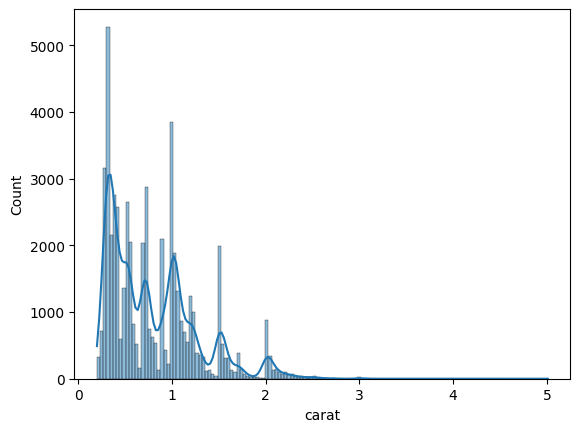

In [7]:
sns.histplot(x='carat', data = data, kde=True)
plt.show()

Insights

Most diamonds are small (0.2 to 1.0 carat).

Fewer diamonds have high carat values (above 2.0).

The graph is right-skewed — large diamonds are rare but important.

Spikes show popular sizes like 0.3, 0.5, 1.0 carat.



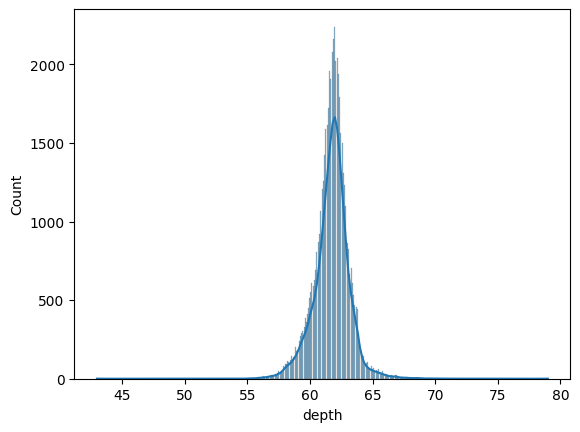

In [8]:
sns.histplot(x='depth', data = data, kde=True)
plt.show()

Insights

Most diamonds have a depth between 60% and 63%.

The distribution is almost symmetric (bell-shaped).

Very few diamonds have depth below 55% or above 65% — these could be outliers.

Ideal depth improves brilliance; too shallow or too deep can reduce value.

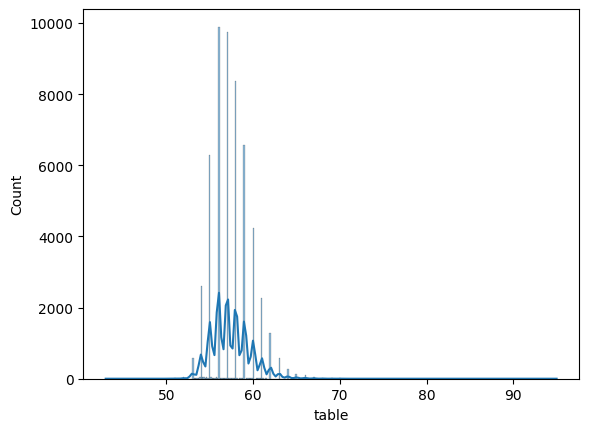

In [9]:
sns.histplot(x='table', data = data, kde=True)
plt.show()

Insights

Most diamonds have a table width between 54% and 60%.

The distribution is slightly right-skewed.

Few diamonds have very large table values (above 65%) — possible outliers.

Ideal table size ensures better light reflection and beauty.

In [10]:
data.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


<Axes: xlabel='carat', ylabel='price'>

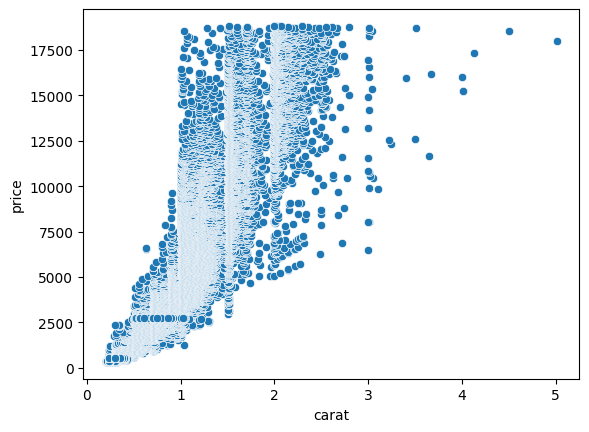

In [11]:
sns.scatterplot(x='carat', y='price', data=data)

Insights

As carat increases, price also increases — strong positive correlation.

The relationship is not perfectly linear — price jumps more sharply after ~1 carat.

Some vertical clusters show popular carat values (e.g., 0.5, 1.0, 1.5 carat).

There are a few very high-price diamonds — possible outliers.

<Axes: xlabel='depth', ylabel='price'>

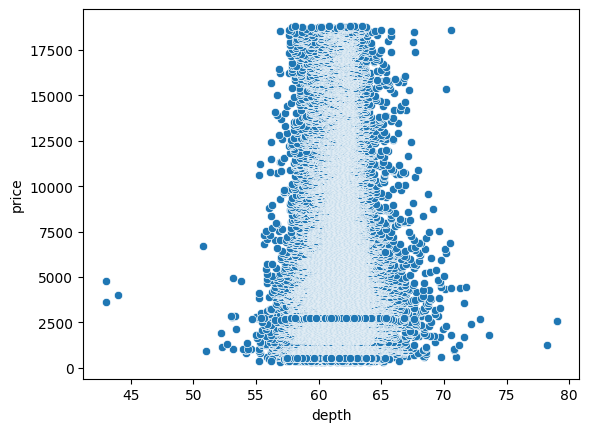

In [12]:
sns.scatterplot(x='depth', y='price', data=data)

Insights

There's no clear relationship between depth and price.

Most diamonds have depth between 60% to 63% — forming a dense vertical band.

Prices are spread widely at each depth level.

A few points at very low or high depth look like outliers.



<Axes: xlabel='table', ylabel='price'>

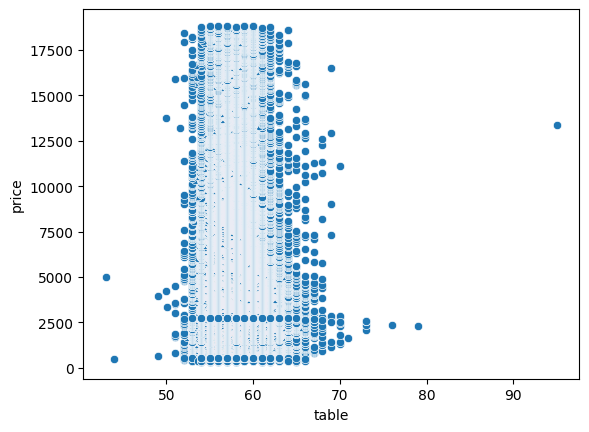

In [13]:
sns.scatterplot(x='table', y='price', data=data)

Insights

There is no clear pattern between table and price.

Most diamonds have a table size between 54% and 62% — forming a dense vertical line.

Price values are spread out across all table sizes.

A few extreme table values (above 70%) appear to be outliers.



# Feature Engineering and Data Preprocessing

In [14]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

There is no null values in any column

In [15]:
data.loc[data['x']==0] 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [16]:
data.loc[data['y']==0] 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [17]:
data.loc[data['z']==0] 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [18]:
data['x'].replace(0, np.median(data['x']), inplace=True)
data['y'].replace(0, np.median(data['y']), inplace=True)
data['z'].replace(0, np.median(data['z']), inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_10236\3400879948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['x'].replace(0, np.median(data['x']), inplace=True)
C:\Users\adity\AppData\Local\Temp\ipykernel_10236\3400879948.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Its all done with handling categorical data with median

In [19]:
# Using Label Encoding for converting categoorical data into numeric values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['cut', 'color', 'clarity']:
    data[col] = le.fit_transform(data[col])

In [20]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [21]:
# removing unnamed column

data = data.drop(columns=['Unnamed: 0'])


In [22]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


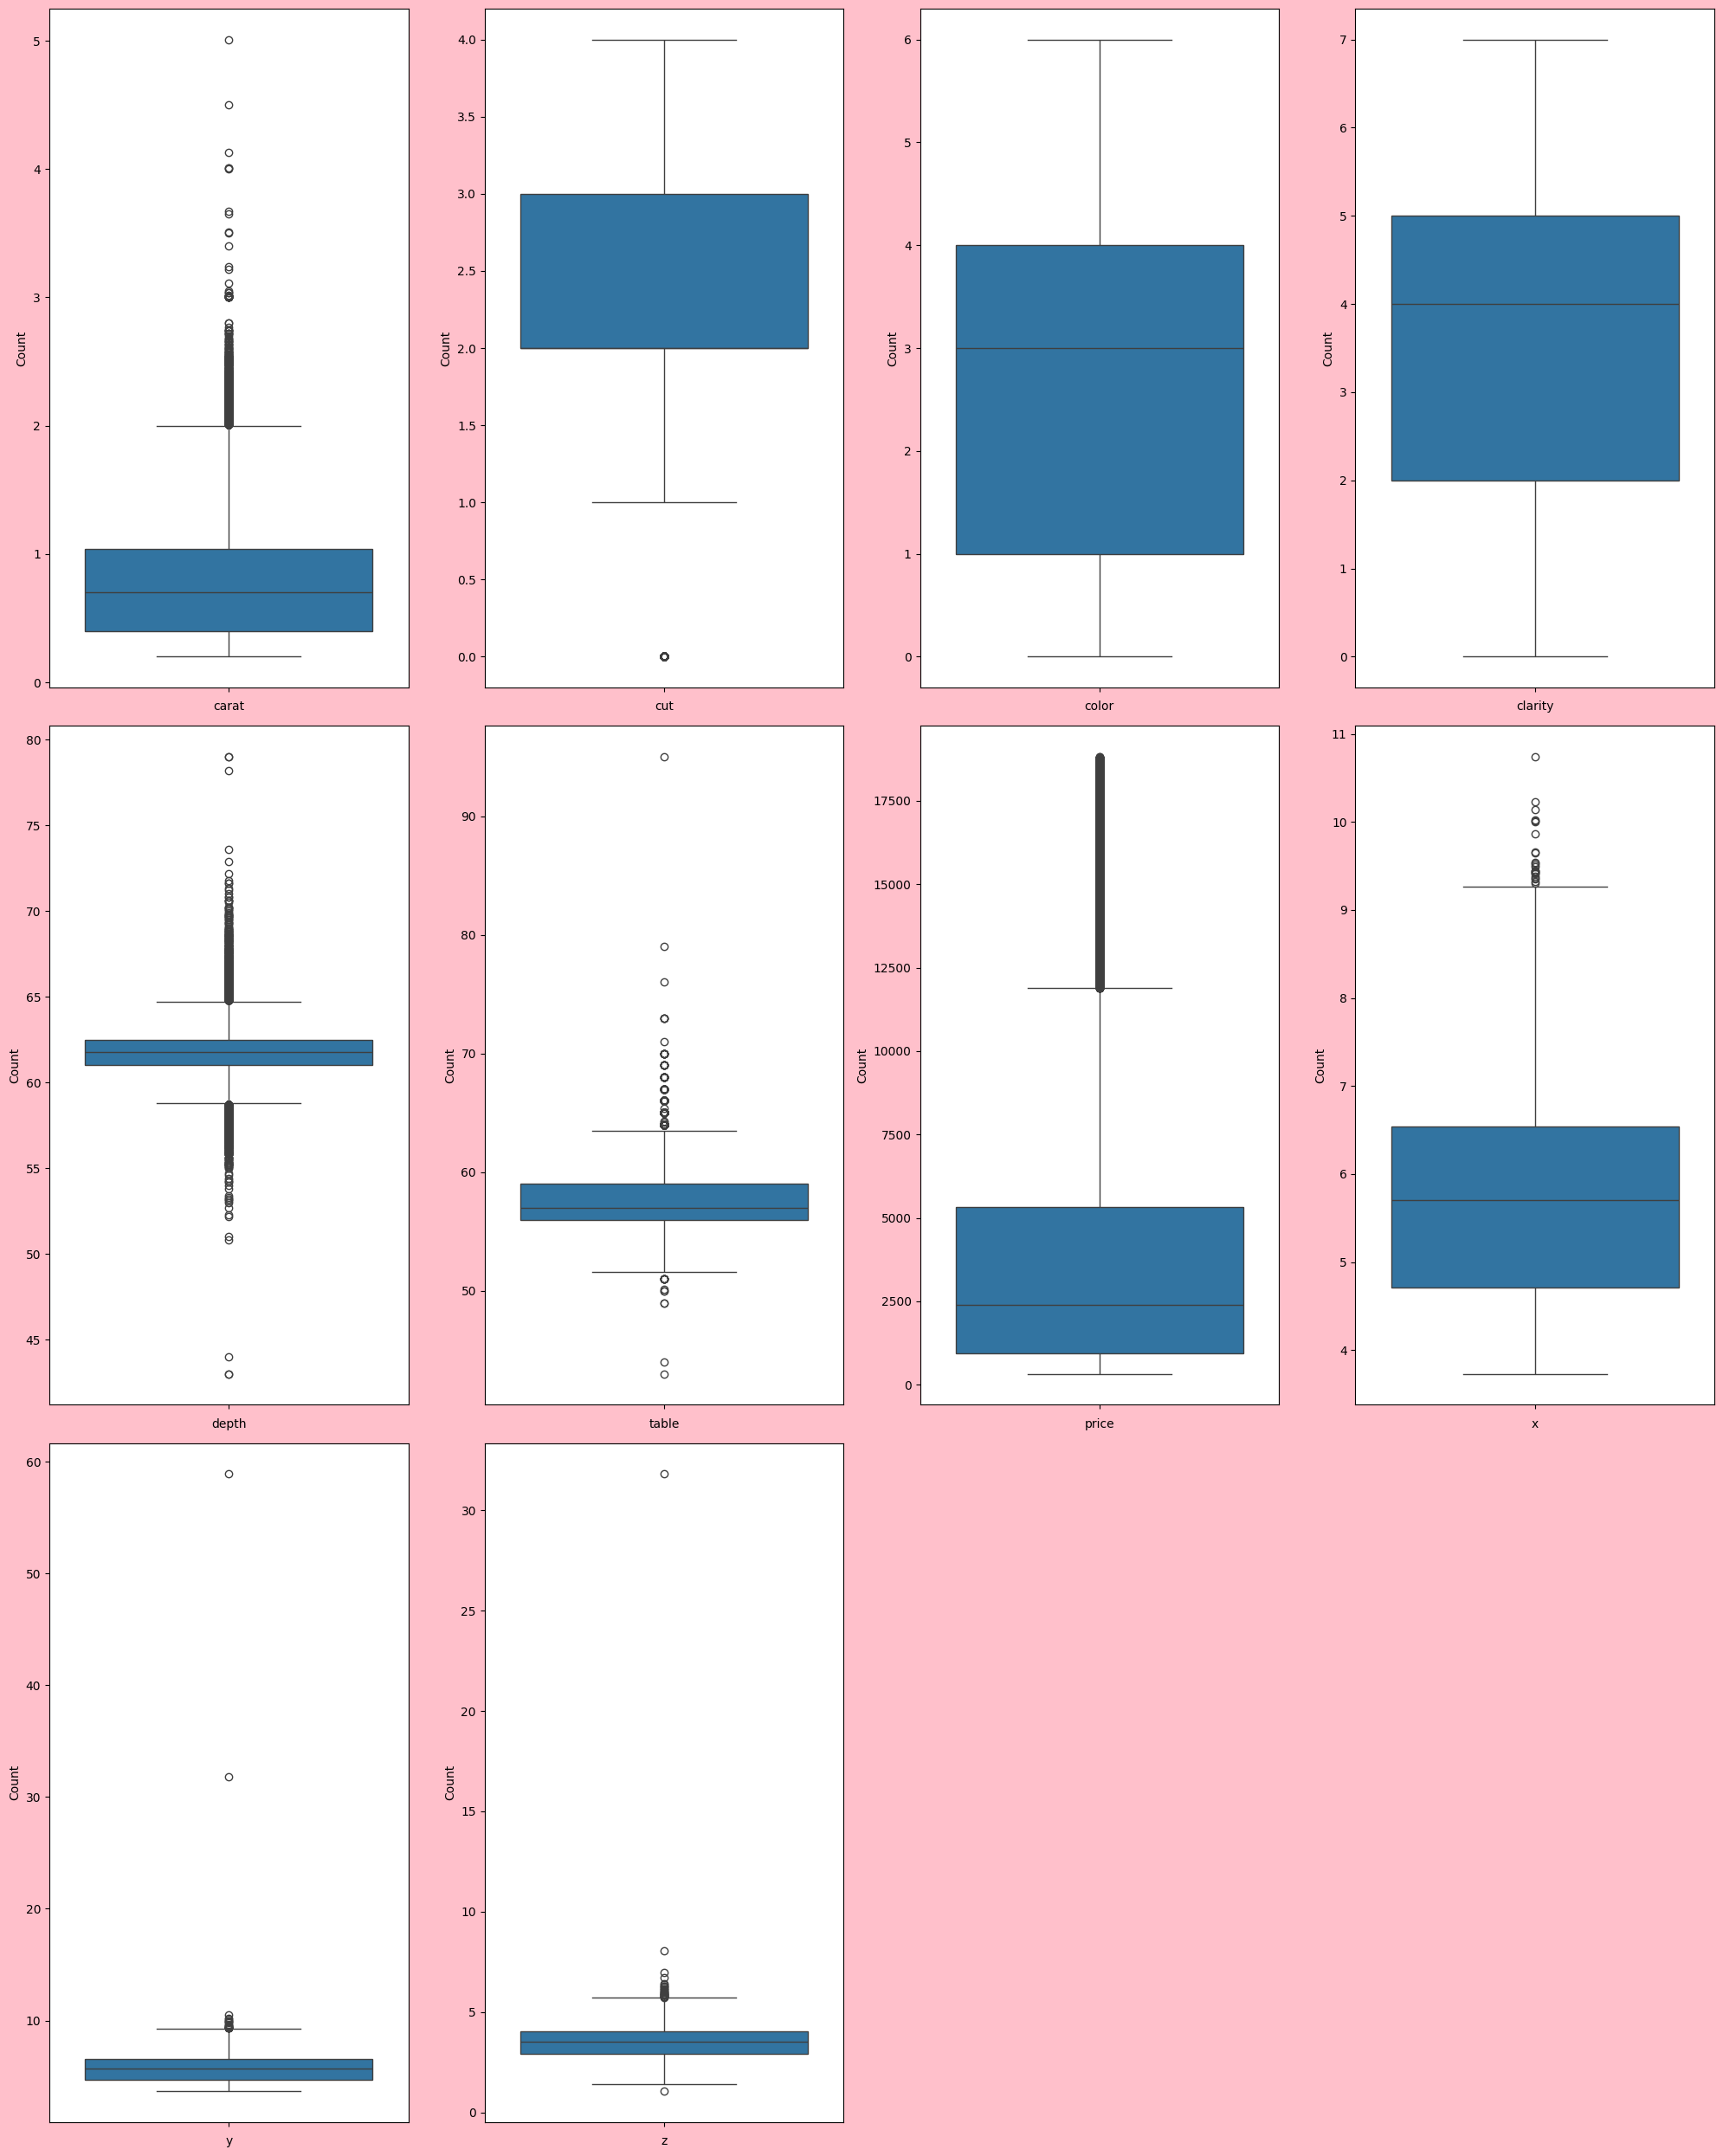

In [23]:
# Checking for outliers

plt.figure(figsize=(20, 25), facecolor='pink')
plotnumber = 1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(3, 4, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
    plotnumber+=1
plt.tight_layout()

Insights

carat: Most diamonds are small; some large outliers exist.

cut, color, clarity: Categories are well-distributed; no outliers.

depth: Mostly between 60–63%; few outliers.

table: Many values around 57–59; some high outliers.

price: Prices vary a lot; many high-price outliers.

x, y, z: Most values are normal, but some are too high — may be errors.



Outlier handling using IQR capping method

In [24]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(data):
    capped_data = data.copy()
    for col in data.select_dtypes(include=np.number).columns:
        Q1 = data[col].quantile(0.25)     # 25th percentile
        Q3 = data[col].quantile(0.75)     # 75th percentile
        IQR = Q3 - Q1                   # Interquartile Range
        lower = Q1 - 1.5 * IQR          # Lower bound
        upper = Q3 + 1.5 * IQR          # Upper bound
        # Cap the values
        capped_data[col] = np.clip(data[col], lower, upper)
    return capped_data

# Apply the function to your dataset
capped_data = cap_outliers_iqr(data)


In [25]:
capped_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2.0,1,3,61.50,55.0,326.0,3.95,3.98,2.43
1,0.21,3.0,1,2,59.80,61.0,326.0,3.89,3.84,2.31
2,0.23,1.0,1,4,58.75,63.5,327.0,4.05,4.07,2.31
3,0.29,3.0,5,5,62.40,58.0,334.0,4.20,4.23,2.63
4,0.31,1.0,6,3,63.30,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0,2,60.80,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1.0,0,2,63.10,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4.0,0,2,62.80,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3.0,4,3,61.00,58.0,2757.0,6.15,6.12,3.74


In [26]:
capped_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.792558,2.567927,2.594197,3.835150,61.749156,57.438561,3732.145690,5.731839,5.733793,3.539359
std,0.457089,0.993589,1.701105,1.724591,1.270254,2.161139,3436.769344,1.119016,1.111132,0.691047
min,0.200000,0.500000,0.000000,0.000000,58.750000,51.500000,326.000000,3.730000,3.680000,1.215000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,2.000000,4.000000,6.000000,7.000000,64.750000,63.500000,11885.625000,9.285000,9.270000,5.735000


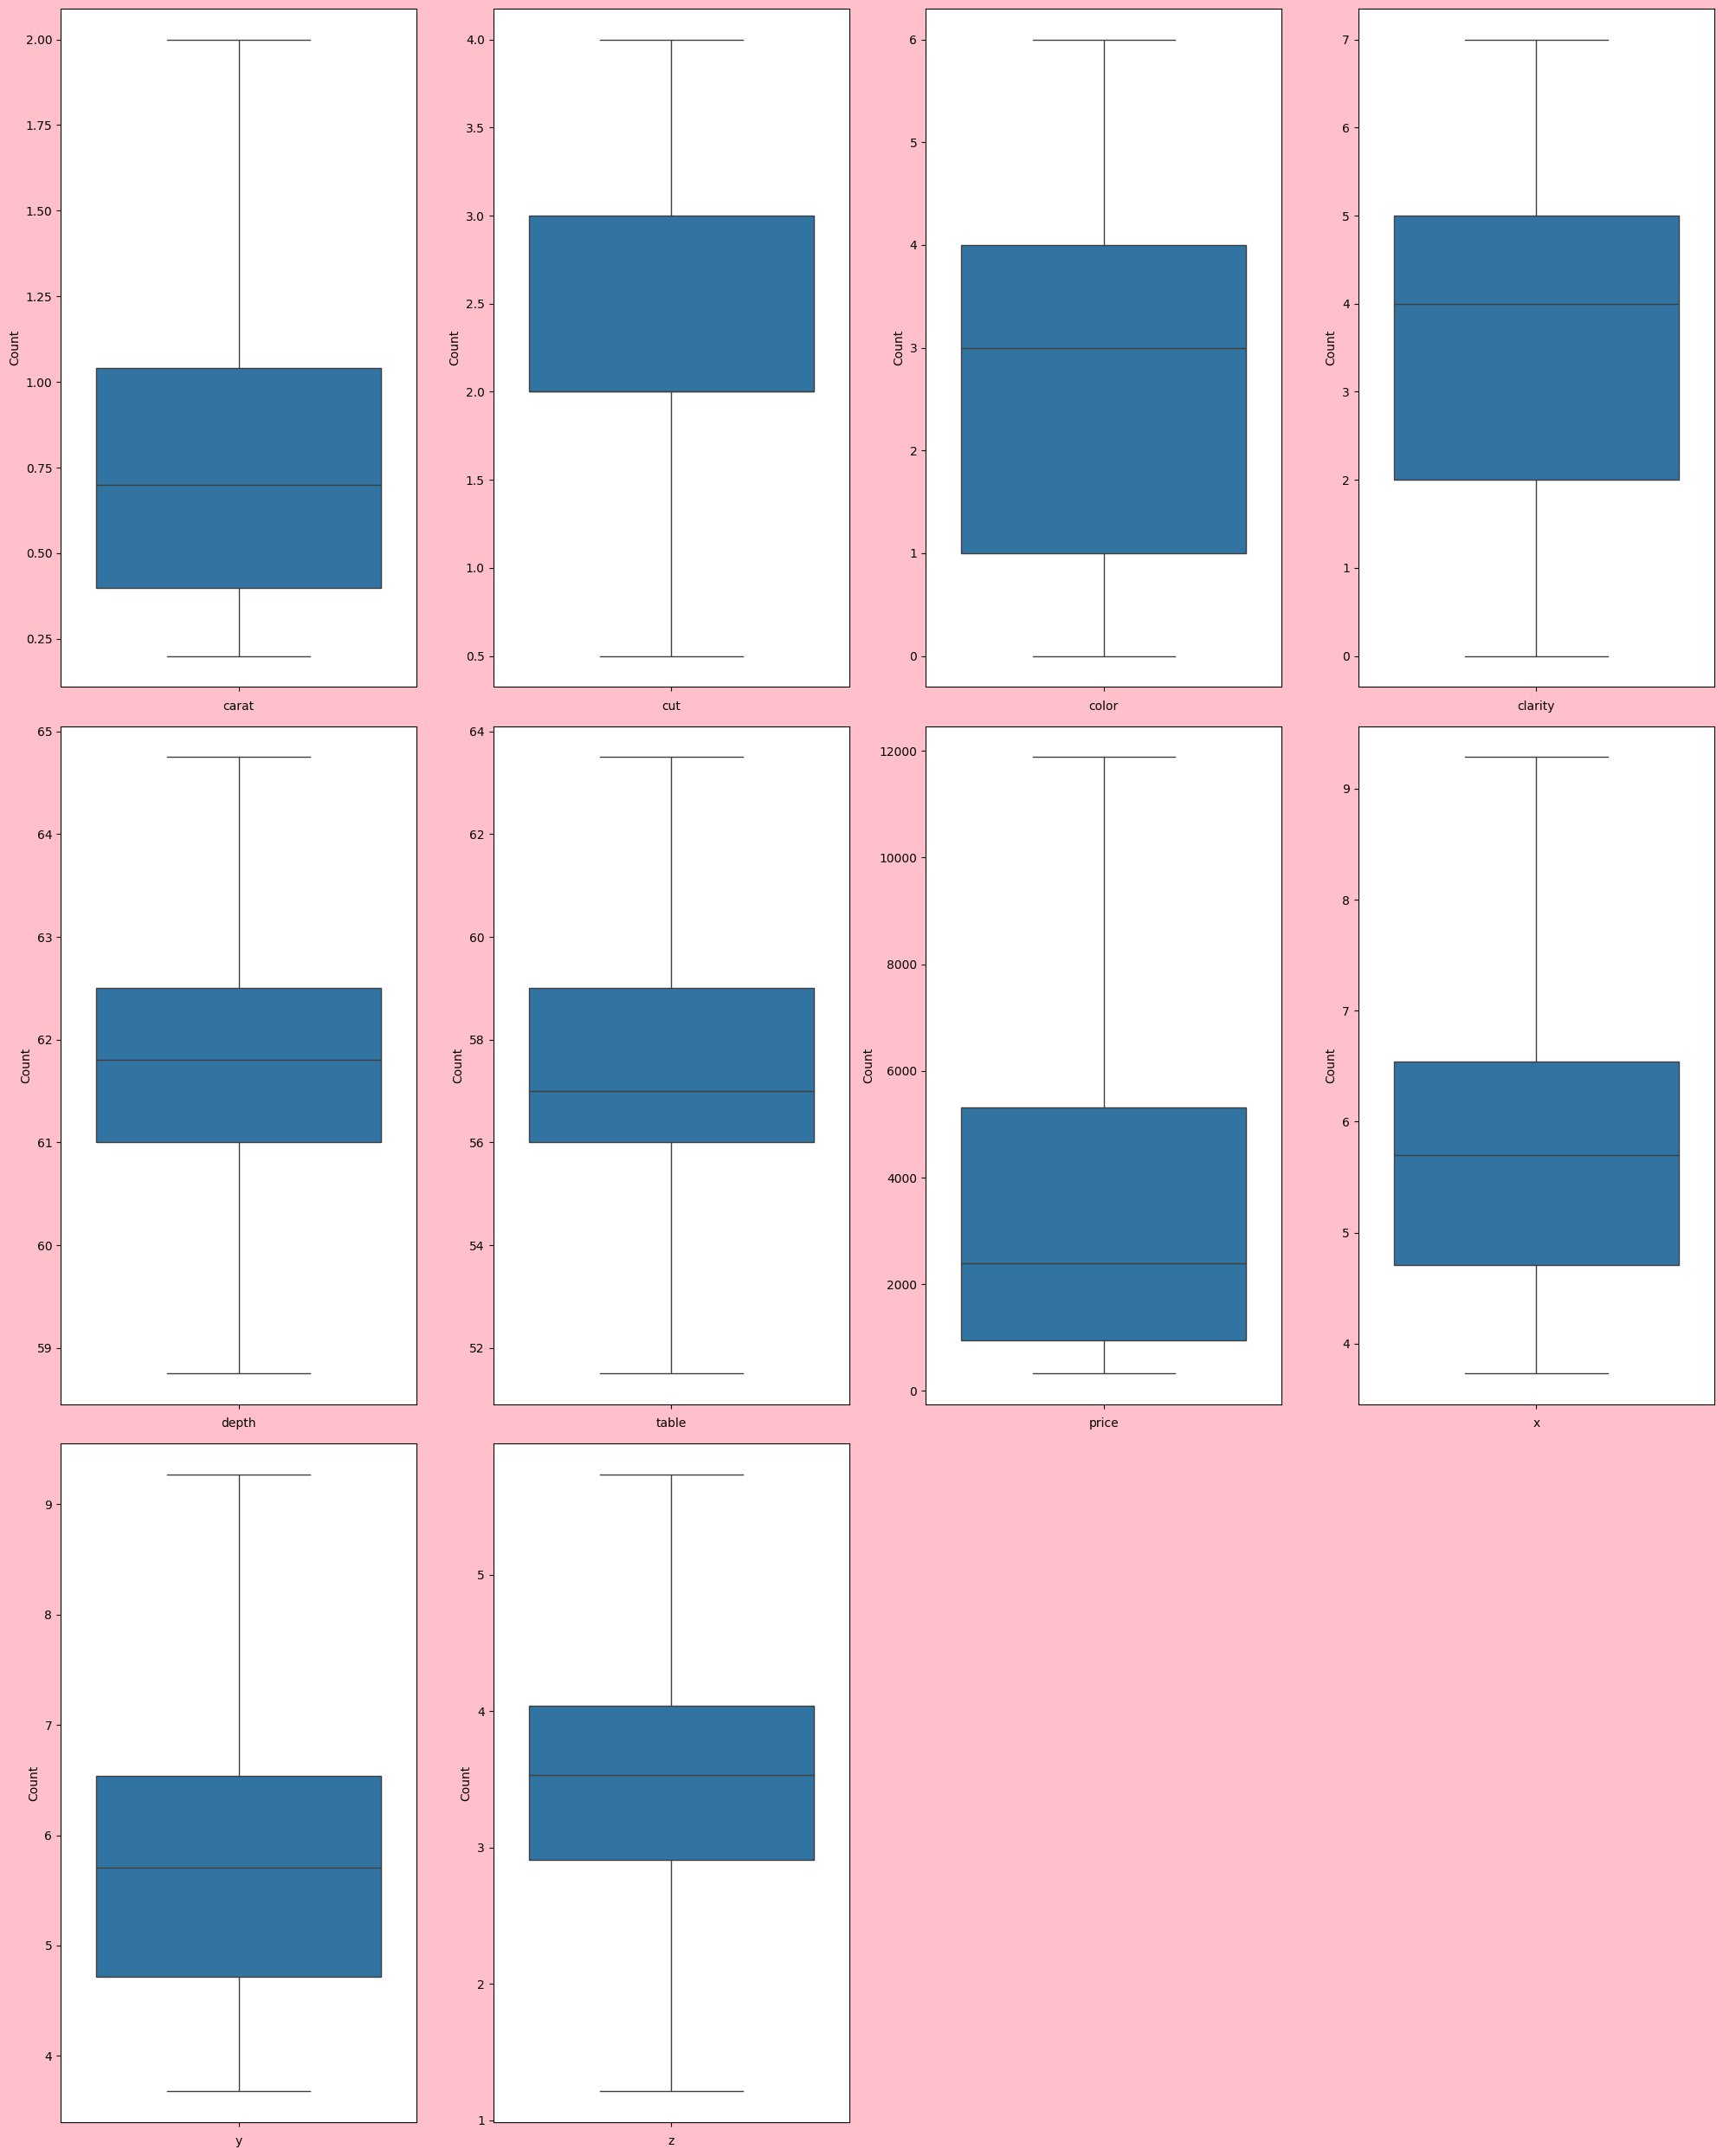

In [27]:

plt.figure(figsize=(20, 25), facecolor='pink')
plotnumber = 1

for column in capped_data:
    if plotnumber<=10:
        ax=plt.subplot(3, 4, plotnumber)
        sns.boxplot(capped_data[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
    plotnumber+=1
plt.tight_layout()

Outliers successfully removed

# Feature Selection

In [28]:
tc = capped_data.corr()
tc

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.027810,0.289054,-0.213409,0.021868,0.187523,0.936588,0.983099,0.982231,0.981047
cut,0.027810,1.000000,0.002587,0.021731,-0.182935,0.188406,0.043445,0.029804,0.034974,0.010678
color,0.289054,0.002587,1.000000,-0.027795,0.047227,0.027117,0.176615,0.270695,0.270413,0.274733
clarity,-0.213409,0.021731,-0.027795,1.000000,-0.048162,-0.089735,-0.074692,-0.225920,-0.222963,-0.229468
depth,0.021868,-0.182935,0.047227,-0.048162,1.000000,-0.299886,-0.008726,-0.028712,-0.031418,0.089984
table,0.187523,0.188406,0.027117,-0.089735,-0.299886,1.000000,0.136891,0.198717,0.192795,0.158932
price,0.936588,0.043445,0.176615,-0.074692,-0.008726,0.136891,1.000000,0.913208,0.914621,0.908135
x,0.983099,0.029804,0.270695,-0.225920,-0.028712,0.198717,0.913208,1.000000,0.998514,0.990593
y,0.982231,0.034974,0.270413,-0.222963,-0.031418,0.192795,0.914621,0.998514,1.000000,0.990336
z,0.981047,0.010678,0.274733,-0.229468,0.089984,0.158932,0.908135,0.990593,0.990336,1.000000


<Axes: >

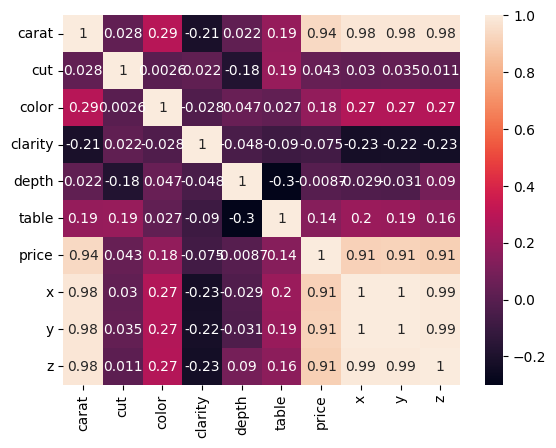

In [29]:
sns.heatmap(tc, annot=True)

x, y, and z are highly correlated with:

carat (all above 0.98)

with each other (x↔y↔z: ~0.99)

They show length, width, and height of the diamond.

They are almost the same as carat (diamond weight).

Keeping all of them adds duplicate information.

It can make the model confused or slower.

carat alone is enough — it already explains price well.

In [30]:
data1 = capped_data.drop(columns=['x', 'y', 'z'])

In [31]:
data1

,carat,cut,color,clarity,depth,table,price
0,0.23,2.0,1,3,61.50,55.0,326.0
1,0.21,3.0,1,2,59.80,61.0,326.0
2,0.23,1.0,1,4,58.75,63.5,327.0
3,0.29,3.0,5,5,62.40,58.0,334.0
4,0.31,1.0,6,3,63.30,58.0,335.0
...,...,...,...,...,...,...,...
53935,0.72,2.0,0,2,60.80,57.0,2757.0
53936,0.72,1.0,0,2,63.10,55.0,2757.0
53937,0.70,4.0,0,2,62.80,60.0,2757.0
53938,0.86,3.0,4,3,61.00,58.0,2757.0


# Model Creation

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
X = data1.drop(columns = ['price']) # Independent variables
y = data1['price'] # Dependent or target varaible.

In [34]:
X

,carat,cut,color,clarity,depth,table
0,0.23,2.0,1,3,61.50,55.0
1,0.21,3.0,1,2,59.80,61.0
2,0.23,1.0,1,4,58.75,63.5
3,0.29,3.0,5,5,62.40,58.0
4,0.31,1.0,6,3,63.30,58.0
...,...,...,...,...,...,...
53935,0.72,2.0,0,2,60.80,57.0
53936,0.72,1.0,0,2,63.10,55.0
53937,0.70,4.0,0,2,62.80,60.0
53938,0.86,3.0,4,3,61.00,58.0


In [35]:
y

0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 53940, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [37]:
X_train

,carat,cut,color,clarity,depth,table
35965,0.25,1.0,1,7,64.75,58.0
52281,0.84,2.0,6,2,61.80,56.0
6957,1.05,3.0,6,5,61.10,58.0
9163,1.02,2.0,2,3,60.70,56.0
50598,0.61,2.0,2,4,61.80,57.0
...,...,...,...,...,...,...
11284,1.05,4.0,5,5,62.40,59.0
44732,0.47,2.0,0,4,61.00,55.0
38158,0.33,4.0,2,1,60.30,58.0
860,0.90,3.0,6,2,62.80,59.0


In [38]:
y_train

35965     476.0
52281    2493.0
6957     4145.0
9163     4541.0
50598    2283.0
          ...  
11284    4975.0
44732    1617.0
38158    1014.0
860      2871.0
15795    6320.0
Name: price, Length: 40455, dtype: float64

In [39]:
X_test

,carat,cut,color,clarity,depth,table
1388,0.24,2.0,3,6,62.1,56.0
50052,0.58,4.0,2,7,60.0,57.0
41645,0.40,2.0,1,7,62.1,55.0
42377,0.43,3.0,1,7,60.8,57.0
17244,1.55,2.0,1,3,62.3,55.0
...,...,...,...,...,...,...
36825,0.56,4.0,6,2,60.3,59.0
24803,1.63,1.0,2,2,59.8,56.0
20999,1.21,2.0,1,5,62.4,54.0
8471,1.01,3.0,2,3,62.2,59.0


In [40]:
y_test

1388       559.000
50052     2201.000
41645     1238.000
42377     1304.000
17244     6901.000
           ...    
36825      957.000
24803    11885.625
20999     9215.000
8471      4416.000
4204      3564.000
Name: price, Length: 13485, dtype: float64

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred

array([  78.72067178, 3346.52579052, 2067.38904972, ..., 7731.11418571,
       5160.81151269, 5118.76062504])

In [44]:
y_test

1388       559.000
50052     2201.000
41645     1238.000
42377     1304.000
17244     6901.000
           ...    
36825      957.000
24803    11885.625
20999     9215.000
8471      4416.000
4204      3564.000
Name: price, Length: 13485, dtype: float64

# Evaluate Model

In [45]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [46]:
r2score=r2_score(y_test,y_pred)

In [47]:
r2score

0.9077279744786377

In [48]:
X_test.shape

(13485, 6)

In [49]:
adjusted_r2 = 1-((1-0.9077279744786377)*(13485-1)/(13485-6-1))
adjusted_r2

0.9076868977496625

Our model is working well bcoz r2score and adjusted r2score are equal

In [50]:
import math
print(mean_squared_error(y_test,y_pred))

1076971.6903813416


In [51]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))

1037.7724656114854


In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X_train, y_train)

KNeighborsRegressor()

In [54]:
y_predi = model2.predict(X_test)

In [55]:
y_predi

array([ 847. , 4225. , 1152. , ..., 4986.8, 4547.2, 4082.8])

In [56]:
r2score=r2_score(y_test,y_predi)

In [57]:
r2score

0.8053838426138844

In [58]:
adjusted_r2 = 1-((1-0.8053838426138844)*(13485-1)/(13485-6-1))
adjusted_r2

0.8052972053572947

In [59]:
import math
print(mean_squared_error(y_test,y_predi))

2271502.016037588


Conclusion: In this project, a machine learning model was developed to accurately predict diamond prices using important features such as carat, cut, color, clarity, depth, and table. The dataset was carefully cleaned by removing the unnecessary Unnamed: 0 column and highly correlated features like x, y, and z, which were redundant due to their strong correlation with carat. Categorical variables were converted into numerical form for compatibility with the model. Exploratory Data Analysis (EDA) highlighted that carat had the strongest influence on price, followed by color and table.

Multiple models were trained and evaluated, including Linear Regression and K-Nearest Neighbors (KNN). While KNN achieved an R² score of 0.80, the Linear Regression model significantly outperformed it with an R² score of 0.91 and adjusted R² of 0.9076, clearly demonstrating its superior ability to explain the variance in diamond prices. Given its high accuracy, simplicity, and interpretability, Linear Regression is the preferred model for this prediction task. It provides reliable performance with minimal complexity, making it well-suited for both deployment and business insights.